In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
compas = pd.read_csv('data/compas_clean.csv')
compas_rep = pd.read_csv('results/representation_compas_NFR.csv', index_col=0)

In [53]:
compas_scores = [0.069, 0.075, 0.107, 0.106, 0.04]
bank_scores = [0.211, 0.235, 3.286,  1.947, 0.188]

metrics = {}
models = ['Original', 'Original-P', 'AE', 'AE_P', 'NFR']
for m in range(len(compas_scores)):
    metrics[models[m]] = (compas_scores[m], bank_scores[m])
    
metrics

{'AE': (0.107, 3.286),
 'AE_P': (0.106, 1.947),
 'NFR': (0.04, 0.188),
 'Original': (0.069, 0.211),
 'Original-P': (0.075, 0.235)}

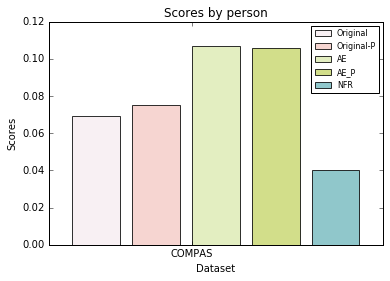

In [60]:
# data to plot
n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(1)
bar_width = 0.1
space = 0.025
opacity = 0.8

colors = ['#F7EDF0', '#F4CBC6', '#DCEAB2', '#C7D66D', '#75B9BE']

for i in range(5):
    plt.bar(index + i*(bar_width) + (i + 2) *space, metrics[models[i]][0], bar_width,
            alpha=opacity,
            color=colors[i],
            label=models[i])
    

# plt.bar(index + 2 *bar_width, means_bob, bar_width,
# alpha=opacity,
# color='y',
# label='Bob')

plt.xlabel('Dataset')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + 3* bar_width, ('COMPAS', 'Bank'))
plt.legend(prop={'size': 8})

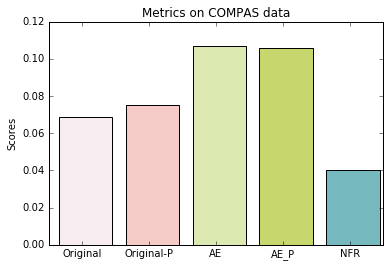

In [75]:
y_pos = np.arange(len(models))

plt.bar(y_pos + (i + 2) *space, compas_scores, color=colors)
plt.xticks(y_pos + i*(bar_width + space), models)
plt.ylabel('Scores')
plt.title('Metrics on COMPAS data')
# plt.show()

plt.savefig('compas_emd.png')

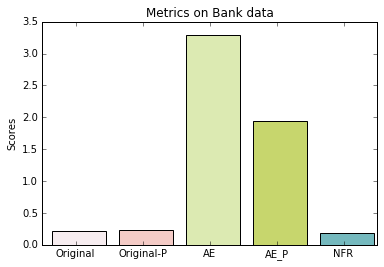

In [77]:
plt.bar(y_pos + (i + 2) *space, bank_scores, color=colors)
plt.xticks(y_pos + i*(bar_width + space), models)
plt.ylabel('Scores')
plt.title('Metrics on Bank data')
plt.savefig('bank_emd.png')